In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
df_url = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images"
data_dir = pathlib.Path(df_url)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print (image_count)
print (list(data_dir.glob('*/*.jpeg')))

1
[WindowsPath('C:/Users/Waldosir/Documents/2doCodigo/TopicoIA/Marzo/BD/corpus_images_1/bored/61.jpeg')]


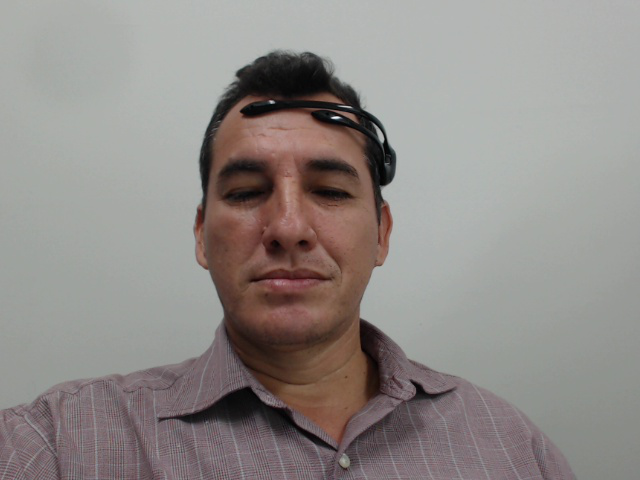

In [5]:
bored_list = list(data_dir.glob('bored/*'))
PIL.Image.open(str(bored_list[0]))
engaged_list = list(data_dir.glob('engaged/*'))
PIL.Image.open(str(engaged_list[0]))
excited_list = list(data_dir.glob('excited/*'))
PIL.Image.open(str(excited_list[0]))
focused_list = list(data_dir.glob('focused/*'))
PIL.Image.open(str(focused_list[0]))
interested_list = list(data_dir.glob('interested/*'))
PIL.Image.open(str(interested_list[0]))
relaxed_list = list(data_dir.glob('relaxed/*'))
PIL.Image.open(str(relaxed_list[0]))

In [6]:
import face_recognition
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw

In [23]:
from PIL import Image
import numpy as np
import pandas as pd
import face_recognition

def process_image(image_path, label, directory):
    try:
        # Cargar la imagen
        image = face_recognition.load_image_file(image_path)
        
        # Redimensionar la imagen a 150x150
        resized_image = np.array(Image.fromarray(image).resize((150, 150)))
        
        # Detectar puntos de referencia faciales y ubicaciones
        face_landmarks_list = face_recognition.face_landmarks(resized_image)
        face_locations = face_recognition.face_locations(resized_image)

        # Recortar la imagen según las ubicaciones de las caras
        cropped_images = []
        for location in face_locations:
            top, right, bottom, left = location
            cropped_image = resized_image[top:bottom, left:right]
            cropped_images.append(cropped_image)

        # Añadir información al directorio
        directory['Hitos faciales'].append(face_landmarks_list)
        directory['Imagen con zoom'].append(cropped_images)
        directory['Etiquetas'].append(label)
        directory['Imagen'].append(resized_image)
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")

# Directorio para almacenar la información procesada
directorio = {'Imagen': [], 'Imagen con zoom': [], 'Hitos faciales': [], 'Etiquetas': []}

# Listas de imágenes y sus respectivas etiquetas
image_lists = [bored_list, engaged_list, excited_list, focused_list, interested_list, relaxed_list]
labels = ['bored', 'engaged', 'excited', 'focused', 'interested', 'relaxed']

# Procesamiento de imágenes
x = 0
for image_list, label in zip(image_lists, labels):
    for image_path in image_list:
        process_image(image_path, label, directorio)
        x += 1
        if x>20:
            break
    x = 0
# Crear DataFrame con la información procesada
df = pd.DataFrame(directorio)


In [24]:
df.head()

,Imagen,Imagen con zoom,Hitos faciales,Etiquetas
0,"[[[173, 175, 172], [173, 175, 172], [173, 175,...","[[[[174 178 175], [177 179 176], [177 178 177]...","[{'chin': [(47, 65), (47, 71), (47, 77), (48, ...",bored
1,"[[[173, 175, 172], [173, 175, 172], [173, 175,...","[[[[174 178 175], [177 179 176], [177 178 177]...","[{'chin': [(47, 65), (47, 71), (47, 77), (48, ...",engaged
2,"[[[173, 175, 172], [173, 175, 172], [173, 175,...","[[[[174 178 175], [177 179 176], [177 178 177]...","[{'chin': [(47, 65), (47, 71), (47, 77), (48, ...",excited
3,"[[[173, 175, 172], [173, 175, 172], [173, 175,...","[[[[174 178 175], [177 179 176], [177 178 177]...","[{'chin': [(47, 65), (47, 71), (47, 77), (48, ...",focused
4,"[[[173, 175, 172], [173, 175, 172], [173, 175,...","[[[[174 178 175], [177 179 176], [177 178 177]...","[{'chin': [(47, 65), (47, 71), (47, 77), (48, ...",interested


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Obtener las listas de puntos faciales
facial_landmarks = df['Hitos faciales'].tolist()

# Transponer las coordenadas x e y de cada punto facial para que pad_sequences funcione correctamente
facial_landmarks_transposed = [[[point[j][i] for point in sample] for i in range(2)] for j in range(72) for sample in facial_landmarks]

# Rellenar las secuencias con ceros para que todas tengan la misma longitud
X = pad_sequences(facial_landmarks_transposed, padding='post', dtype='float32')

# Restaurar la forma correcta
X = X.reshape(-1, 72, 2)

# Verificar la forma de X
print(X.shape)


KeyError: 0

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Obtener las listas de puntos faciales
facial_landmarks = df['Hitos faciales'].tolist()

# Rellenar las secuencias con ceros para que todas tengan la misma longitud
X = pad_sequences(facial_landmarks, padding='post', dtype='float32')

# Verificar la forma de X
print(X.shape)


TypeError: float() argument must be a string or a number, not 'dict'

In [27]:
# Obtener la longitud máxima de las listas de puntos faciales
max_length = max(len(points) for points in df['Hitos faciales'])

# Rellenar las listas con ceros para que todas tengan la misma longitud
padded_points = df['Hitos faciales'].apply(lambda x: x + [(0, 0)] * (max_length - len(x)))

# Convertir las listas de puntos faciales a un array NumPy
X = np.array(padded_points.tolist())

In [20]:
X = np.array(df['Hitos faciales'].tolist())

In [22]:
print(df['Hitos faciales'][10].shape)

KeyError: 10

In [25]:
# Guardar el DataFrame modificado en un archivo CSV
df.to_pickle('emotions_dataset.pkl')
#df.to_csv('emotions_dataset.csv')
